In [183]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, roc_curve, precision_recall_curve, accuracy_score


In [184]:
datamatch = pd.read_csv("C:\\Users\\rohan.fouzdar\\Downloads\\archive\\IPL_Matches_2008_2022.csv")
datamatch.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [185]:
databyb = pd.read_csv("C:\\Users\\rohan.fouzdar\\Downloads\\archive\\IPL_Ball_by_Ball_2008_2022.csv")
databyb.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [186]:
datamatch['Season'].value_counts()

2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: Season, dtype: int64

In [187]:
datamatchlast5IPL=datamatch[datamatch['Season'].isin(['2018','2019','2020/21','2021','2022' ])]

In [188]:
prepdata=datamatchlast5IPL.merge(databyb,on='ID')
prepdata.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [189]:
#prepdata['BoundaryBall']=
BoundaryData=prepdata[prepdata['batsman_run'].isin([4,6])]
BoundaryData['BoundaryBall']=1
BoundaryData['Dotball']=0
BoundaryData.head()

C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_30624\1288824522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BoundaryData['BoundaryBall']=1
C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_30624\1288824522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BoundaryData['DotBall']=0


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BoundaryBall,DotBall
8,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals,1,0
14,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals,1,0
16,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals,1,0
22,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals,1,0
26,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals,1,0


In [190]:
DotData=prepdata[prepdata['total_run'].isin([0])]
DotData['BoundaryBall']=0
DotData['Dotball']=1
DotData.shape

C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_30624\2053681042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DotData['BoundaryBall']=0
C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_30624\2053681042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DotData['Dotball']=1


(25948, 38)

In [191]:
BallsPlayed=prepdata.groupby(['ID','batter'])['batsman_run'].count().to_frame().reset_index()
BallsPlayed.rename(columns={'batsman_run': 'Total_Balls_Played'}, inplace=True)
BallsPlayed.head()

,ID,batter,Total_Balls_Played
0,1136561,AT Rayudu,19
1,1136561,DJ Bravo,30
2,1136561,DL Chahar,1
3,1136561,E Lewis,2
4,1136561,HH Pandya,20


In [192]:
FocusData=BoundaryData.append(DotData, ignore_index = True)

C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_30624\1272272419.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FocusData=BoundaryData.append(DotData, ignore_index = True)


In [193]:
FocusData=FocusData.merge(BallsPlayed,on=['ID','batter'])

In [194]:
FocusDataL4=FocusData[FocusData['overs']>16]

In [195]:
FocusDataL4['Dotball']=FocusDataL4['Dotball'].fillna(0)
FocusDataL4.head()

C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_30624\54630550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FocusDataL4['Dotball']=FocusDataL4['Dotball'].fillna(0)


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BoundaryBall,DotBall,Dotball,Total_Balls_Played
44,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,NaN,NaN,NaN,Rajasthan Royals,1,0.0,0.0,7
46,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,1,TA Boult,caught,R Tewatia,Rajasthan Royals,0,NaN,1.0,7
47,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,NaN,NaN,NaN,Rajasthan Royals,1,0.0,0.0,5
48,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,NaN,NaN,NaN,Rajasthan Royals,0,NaN,1.0,5
49,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,NaN,NaN,NaN,Rajasthan Royals,0,NaN,1.0,5


In [196]:
FocusDataL4.drop(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
        'bowler', 'non-striker', 'extra_type', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'player_out', 'kind', 'fielders_involved', 'BattingTeam','DotBall' ],axis=1,inplace=True)

C:\Users\rohan.fouzdar\AppData\Local\Temp\ipykernel_30624\139290022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FocusDataL4.drop(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',


In [197]:
FocusL4BallsPlayed = prepdata[prepdata['overs']>16].groupby(['batter'])['batsman_run'].count().to_frame().reset_index()
FocusL4BallsPlayed.rename(columns={'batsman_run': 'L4_Balls_Played_Total'}, inplace=True)

In [198]:
print(FocusL4BallsPlayed[FocusL4BallsPlayed['L4_Balls_Played_Total']>120].shape)
FocusL4BallsPlayed[FocusL4BallsPlayed['L4_Balls_Played_Total']>120].head(18)

(17, 2)


,batter,L4_Balls_Played_Total
5,AB de Villiers,161
7,AD Russell,213
14,AR Patel,154
45,DA Miller,125
68,HH Pandya,305
99,KA Pollard,253
101,KD Karthik,274
102,KH Pandya,156
106,KL Rahul,170
134,MP Stoinis,193


In [199]:
FocusDataFinalL4=FocusL4BallsPlayed.merge(FocusDataL4, on='batter',how='inner')


In [200]:
FocusDataFinalL4=FocusDataFinalL4[FocusDataFinalL4['L4_Balls_Played_Total']>120]

In [208]:
FocusDataBoundary=FocusDataFinalL4[FocusDataFinalL4['BoundaryBall']>0].groupby(['batter'])['BoundaryBall'].count().to_frame().reset_index()
FocusDataDot=FocusDataFinalL4[FocusDataFinalL4['Dotball']>0].groupby(['batter'])['Dotball'].count().to_frame().reset_index()


In [211]:
Result=FocusDataBoundary.merge(FocusDataDot,on='batter')
Result=Result.merge(FocusL4BallsPlayed,on='batter')

In [212]:
Result.head(20)

,batter,BoundaryBall,Dotball,L4_Balls_Played_Total
0,AB de Villiers,59,27,161
1,AD Russell,79,71,213
2,AR Patel,33,33,154
3,DA Miller,28,29,125
4,HH Pandya,87,67,305
5,KA Pollard,70,63,253
6,KD Karthik,80,68,274
7,KH Pandya,34,34,156
8,KL Rahul,53,32,170
9,MP Stoinis,53,46,193


In [226]:
Result['BoundariesPerBall']=Result['BoundaryBall']/Result['L4_Balls_Played_Total']
Result['BallsPerDotBall']=Result['L4_Balls_Played_Total']/Result['Dotball']
Result['BoundariesPerBallSquared']=Result['BoundariesPerBall']*Result['BoundariesPerBall']

In [227]:
Result.head(20)

,batter,BoundaryBall,Dotball,L4_Balls_Played_Total,BoundariesPerBall,BallsPerDotBall,BoundariesPerBallSquared
0,AB de Villiers,59,27,161,0.366460,5.962963,0.134293
1,AD Russell,79,71,213,0.370892,3.000000,0.137561
2,AR Patel,33,33,154,0.214286,4.666667,0.045918
3,DA Miller,28,29,125,0.224000,4.310345,0.050176
4,HH Pandya,87,67,305,0.285246,4.552239,0.081365
5,KA Pollard,70,63,253,0.276680,4.015873,0.076552
6,KD Karthik,80,68,274,0.291971,4.029412,0.085247
7,KH Pandya,34,34,156,0.217949,4.588235,0.047502
8,KL Rahul,53,32,170,0.311765,5.312500,0.097197
9,MP Stoinis,53,46,193,0.274611,4.195652,0.075411


In [228]:
Result['batter']

0     AB de Villiers
1         AD Russell
2           AR Patel
3          DA Miller
4          HH Pandya
5         KA Pollard
6         KD Karthik
7          KH Pandya
8           KL Rahul
9         MP Stoinis
10          MS Dhoni
11          R Ashwin
12         R Tewatia
13         RA Jadeja
14           RR Pant
15       Rashid Khan
16        SO Hetmyer
Name: batter, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

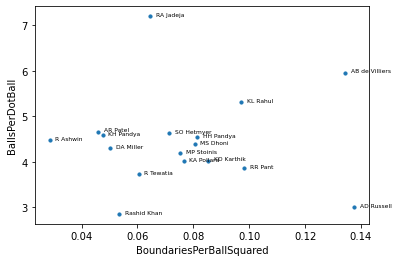

In [237]:
from matplotlib import pyplot as plt
ax=Result.plot.scatter(x = 'BoundariesPerBallSquared', y = 'BallsPerDotBall', s = 10, alpha=1)
for i, txt in enumerate(Result.batter):
   ax.annotate(txt, (Result.BoundariesPerBallSquared.iat[i]+0.002, Result.BallsPerDotBall.iat[i]),fontsize=6)
plt.show

In [239]:
Result.to_csv('C:\\Users\\rohan.fouzdar\\Downloads\\DeathOversBestBatter.csv',sep=',',index=False)